In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
pd.options.display.max_rows = 9999
pd.set_option('display.max_columns', 200)
pd.set_option("display.max_colwidth", 800)
pd.set_option("display.max_rows", 30)

In [2]:
df=pd.read_csv("athlete_events.csv")
df_noc = pd.read_csv("noc_regions.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


#  Section 1: Data  preprocessing (organizing & cleaning)

In [5]:
df_noc[df_noc["region"].isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [6]:
# Create a dictionary for fast lookup
noc_to_country = dict(zip(df_noc['NOC'], df_noc['region']))
# Use apply to create a new 'Country' column
df['Country'] = df['NOC'].apply(lambda noc: noc_to_country.get(noc))
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [7]:
df.isna().sum()

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
Country       370
dtype: int64

In [8]:
df[df["Country"].isna()].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,None
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,None
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,None
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,None


In [9]:
df[df["Country"].isna()]["NOC"].unique()

array(['SGP', 'ROT', 'UNK', 'TUV'], dtype=object)

### -> Add Singapore to df_noc and replace nan values by its notes value

In [10]:
new_rows = pd.DataFrame([
    {'NOC': 'SGP', 'region': "Singapore"}])
df_noc =pd.concat([df_noc, new_rows], ignore_index=True)
df_noc[df_noc["NOC"] == "SGP"]


,NOC,region,notes
230,SGP,Singapore,NaN


In [11]:
df_noc['region'].fillna(df_noc['notes'], inplace=True)

In [12]:
# Create a dictionary for fast lookup
noc_to_country = dict(zip(df_noc['NOC'], df_noc['region']))
# Use apply to create a new 'Country' column
df['Country'] = df['NOC'].apply(lambda noc: noc_to_country.get(noc))
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [13]:
df.isna().sum() # country cleaned

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
Country         0
dtype: int64

In [14]:
df.shape

(271116, 16)

In [15]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### -> drop duplicates

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
sum(df.duplicated())

0

#### -> drop nulls but for Medal column

In [18]:
df.isnull().sum()

ID              0
Name            0
Sex             0
Age          9315
Height      58814
Weight      61527
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      229959
Country         0
dtype: int64

#### -> Drop outliers in Age column

269731


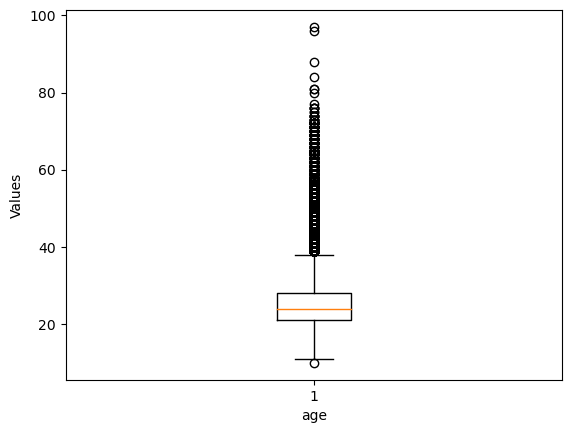

In [19]:
age = list(df["Age"].dropna())
plt.boxplot(age)
plt.xlabel('age')
plt.ylabel('Values')
print(len(df["Age"]))

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_Age_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

250995


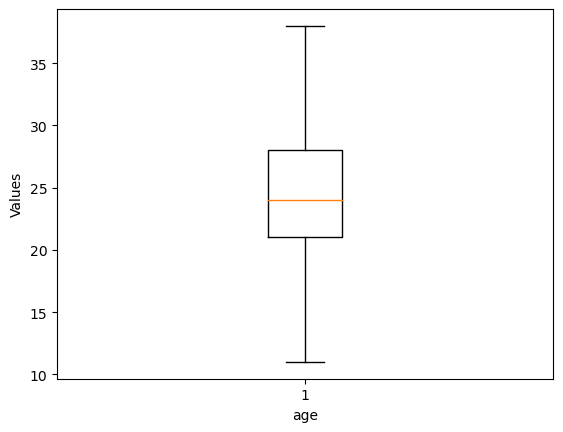

In [21]:
age = list(df_Age_cleaned["Age"])
plt.boxplot(age)
plt.xlabel('age')
plt.ylabel('Values')
print(len(df_Age_cleaned["Age"]))

In [22]:
df_Age_cleaned = df_Age_cleaned.fillna({'Age': df["Age"].mean()})
print(df_Age_cleaned["Age"].mean())

24.721982509611745


In [23]:
df_Age_cleaned.isnull().sum()

ID              0
Name            0
Sex             0
Age             0
Height      45913
Weight      48309
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      213365
Country         0
dtype: int64

In [24]:
sorted(list(df["Year"].unique()))

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [25]:
host_countries = {
    1896: "Greece",          # Summer
    1900: "France",          # Summer
    1904: "USA",             # Summer
    1908: "UK",              # Summer
    1912: "Sweden",          # Summer
    1920: "Belgium",         # Summer
    1924: "France",          # Summer
    1924: "France",          # Winter
    1928: "Netherlands",     # Summer
    1928: "Switzerland",     # Winter
    1932: "USA",             # Summer
    1932: "USA",             # Winter
    1936: "Germany",         # Summer
    1936: "Germany",         # Winter
    1948: "UK",              # Summer
    1948: "Switzerland",     # Winter
    1952: "Finland",         # Summer
    1952: "Norway",          # Winter
    1956: "Australia",       # Summer
    1956: "Italy",           # Winter
    1960: "Italy",           # Summer
    1960: "USA",             # Winter
    1964: "Japan",           # Summer
    1964: "Austria",         # Winter
    1968: "Mexico",          # Summer
    1968: "France",          # Winter
    1972: "Germany",         # Summer
    1972: "Japan",           # Winter
    1976: "Canada",          # Summer
    1976: "Austria",         # Winter
    1980: "Soviet Union",    # Summer
    1980: "USA",             # Winter
    1984: "USA",             # Summer
    1984: "Yugoslavia",      # Winter
    1988: "South Korea",     # Summer
    1988: "Canada",          # Winter
    1992: "Spain",           # Summer
    1992: "France",          # Winter
    1994: "Norway",          # Winter
    1996: "USA",             # Summer
    1998: "Japan",           # Winter
    2000: "Australia",       # Summer
    2002: "USA",             # Winter
    2004: "Greece",          # Summer
    2006: "Italy",           # Winter
    2008: "China",           # Summer
    2010: "Canada",          # Winter
    2012: "UK",              # Summer
    2014: "Russia",          # Winter
    2016: "Brazil",          # Summer
}


In [26]:
len(list(host_countries.values()))

34

### -> data validation 

In [27]:
for i in range(len(list(host_countries.keys()))):
    if(sorted(list(df["Year"].unique()))[i]) == (list(host_countries.keys())[i]):
        print("true")
    else:
        print("false")

true
true
true
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false


In [28]:
df[df["Year"]==1906].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
268,139,"George ""Ioannis"" Abbot",M,NaN,NaN,NaN,Thessalonki-1,GRE,1906 Summer,1906,Summer,Athina,Football,Football Men's Football,Bronze,Greece
887,508,Bernhard Abraham,M,NaN,NaN,NaN,Germany,GER,1906 Summer,1906,Summer,Athina,Gymnastics,Gymnastics Men's Team All-Around,NaN,Germany
918,520,Sidney Solomon Abrahams,M,21.0,NaN,NaN,Great Britain,GBR,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,UK
919,520,Sidney Solomon Abrahams,M,21.0,NaN,NaN,Great Britain,GBR,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN,UK
2170,1208,Ioannis Agrimis,M,NaN,NaN,NaN,"Large boat, Central Naval Prep School ""Poros""-1",GRE,1906 Summer,1906,Summer,Athina,Rowing,Rowing Men's 17-Man Naval Rowing Boats,Gold,Greece


### -> After a google search results that there are many intercalated (unofficially) Olympic games let's drop it

In [29]:
df = df[df["Year"].isin(list(host_countries.keys()))]

In [30]:
for i in range(len(list(host_countries.keys()))):
    if(sorted(list(df["Year"].unique()))[i]) == (list(host_countries.keys())[i]):
        print("true")
    else:
        print("false")

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


#### -> Add host_country column for (df , df_Age_cleaned)

In [31]:
df['host_country'] = df['Year'].apply(lambda Year: host_countries.get(Year))
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,host_country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,France
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,UK
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Canada


In [32]:
df_Age_cleaned['host_country'] = df_Age_cleaned['Year'].apply(lambda Year: host_countries.get(Year))
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,host_country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,France
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,UK
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Canada


### -> Create awarded athelets data frame

In [33]:
df_medals = df[df["Medal"].notna()]
df_medals.drop_duplicates(subset=["Event","Sport","Games","Country","Team","Year"], inplace=True)


/var/folders/73/ym2gq6ss1_v_l64p9gln8r840000gn/T/ipykernel_31495/1776906741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medals.drop_duplicates(subset=["Event","Sport","Games","Country","Team","Year"], inplace=True)


In [34]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Country',
       'host_country'],
      dtype='object')

In [35]:
df.to_csv('olympics_athletes.csv', index=False)

In [36]:
df_Age_cleaned.to_csv('olympics_athletes_Age_cleaned.csv', index=False)


In [37]:
df_medals.to_csv('olympics_medals.csv', index=False)

# Section 2: Questions to Answer

### 1. What Is the Count of hosts by Country?


{'USA': 6, 'France': 4, 'Greece': 2, 'UK': 2, 'Switzerland': 2, 'Norway': 2, 'Italy': 2, 'Austria': 2, 'Japan': 2, 'Canada': 2, 'Sweden': 1, 'Belgium': 1, 'Germany': 1, 'Yugoslavia': 1, 'Australia': 1, 'China': 1, 'Russia': 1, 'Brazil': 1}


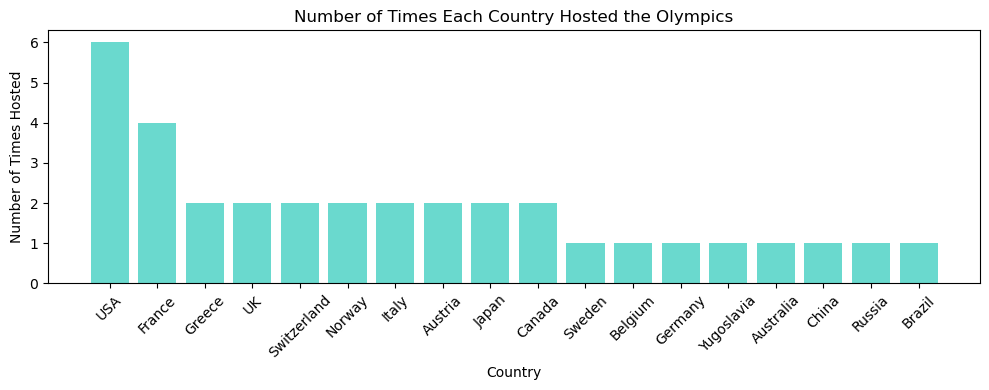

In [38]:
host_list = list(host_countries.values())
values_counts = Counter(host_list)
sorted_repetition_dict = dict(sorted(values_counts.items(), key=lambda x: x[1], reverse=True))
print(sorted_repetition_dict)
plt.figure(figsize=(10, 4))
plt.bar(sorted_repetition_dict.keys(), sorted_repetition_dict.values(), color='#6ad9ce')  # Bar chart
plt.xlabel('Country')
plt.ylabel('Number of Times Hosted')
plt.title('Number of Times Each Country Hosted the Olympics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. What Is the Count of Athletes by Country?


In [39]:
df_Athletes_count = df.groupby("Country")["ID"].count().sort_values(ascending = False).reset_index(name= "Athletes")
df_Athletes_count

,Country,Athletes
0,USA,18523
1,Germany,15630
2,France,12377
3,UK,12002
4,Russia,11692
...,...,...
204,Timor-Leste,9
205,Kosovo,8
206,Tuvalu,7
207,South Sudan,3


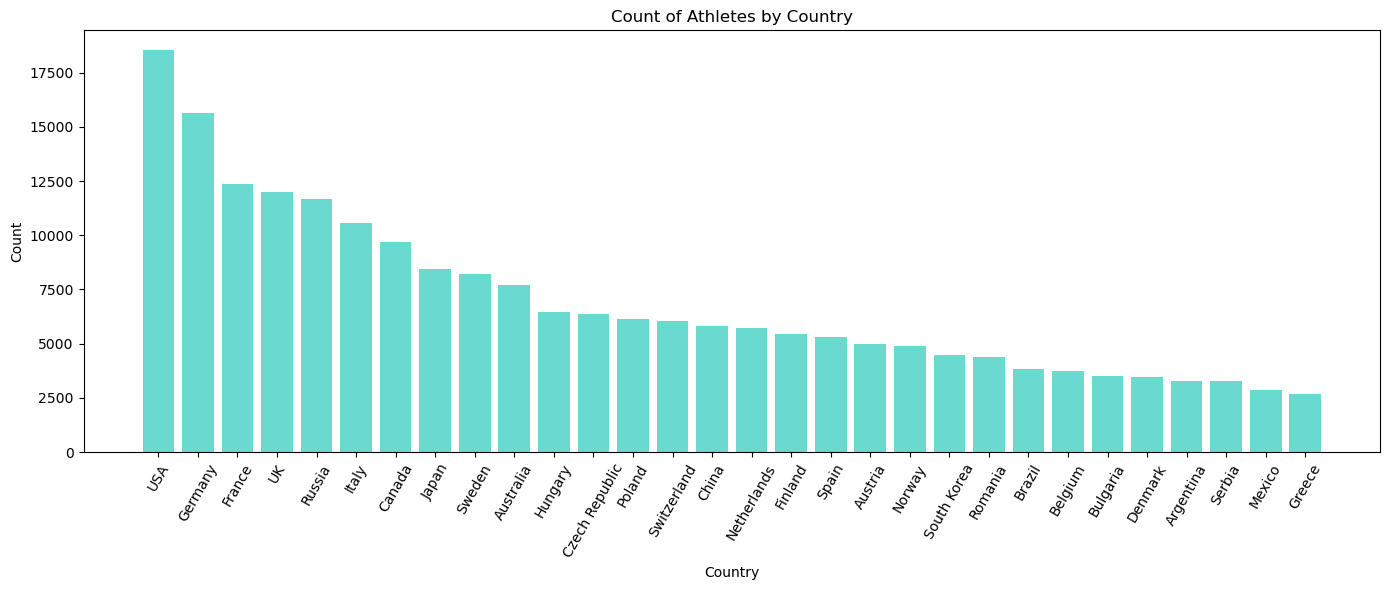

In [40]:
plt.figure(figsize=(14,6))  
plt.bar(df_Athletes_count.Country[0:30], df_Athletes_count.Athletes[0:30], color= '#6ad9ce') 
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Athletes by Country')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [41]:
df_Athletes_count.to_csv('Athletes_by_country.csv', index=False)

### 3. What Is the Count of participations for each Country?


In [42]:
len(df["Games"].unique())

50

In [43]:
df_participations_count = df[["Games","Country"]]
df_participations_count.drop_duplicates(inplace= True)
df_participations_count = df_participations_count.groupby("Country")["Country"].count().sort_values(ascending = False).reset_index(name='Count')
df_participations_count = df_participations_count.astype(object)
result = df_participations_count.groupby('Count')['Country'].apply(list).apply(pd.Series).reset_index().sort_values("Count",ascending=False)
result.head()



/var/folders/73/ym2gq6ss1_v_l64p9gln8r840000gn/T/ipykernel_31495/720833627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participations_count.drop_duplicates(inplace= True)


,Count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
43,50,Italy,France,Switzerland,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,49,Austria,Sweden,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,48,Norway,Hungary,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,47,Finland,Czech Republic,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,46,Greece,Netherlands,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_participations_count.to_csv('df_participations_count.csv', index=True)

### 4. Which Country Has Won the Most Medals in the Olympic Games among the history [ 1896 : 2016 ]?

In [45]:
df_Countries_Medals = df_medals.groupby("Country")["Medal"].count().sort_values(ascending = False).reset_index(name = 'Medals',drop=False)
df_Countries_Medals.head(10)

,Country,Medals
0,USA,2133
1,Russia,1654
2,Germany,1569
3,UK,804
4,France,761
5,Italy,660
6,Sweden,575
7,China,521
8,Australia,497
9,Hungary,471


In [46]:
df_Countries_Medals = df_medals.groupby("Country")["Medal"].count().reset_index(name='Medals')
df_Countries_Medals = df_Countries_Medals.sort_values(by='Medals', ascending=False)
df_Countries_Medals

,Country,Medals
126,USA,2133
100,Russia,1654
41,Germany,1569
125,UK,804
38,France,761
...,...,...
102,Senegal,1
45,Guatemala,1
64,Kosovo,1
61,Jordan,1


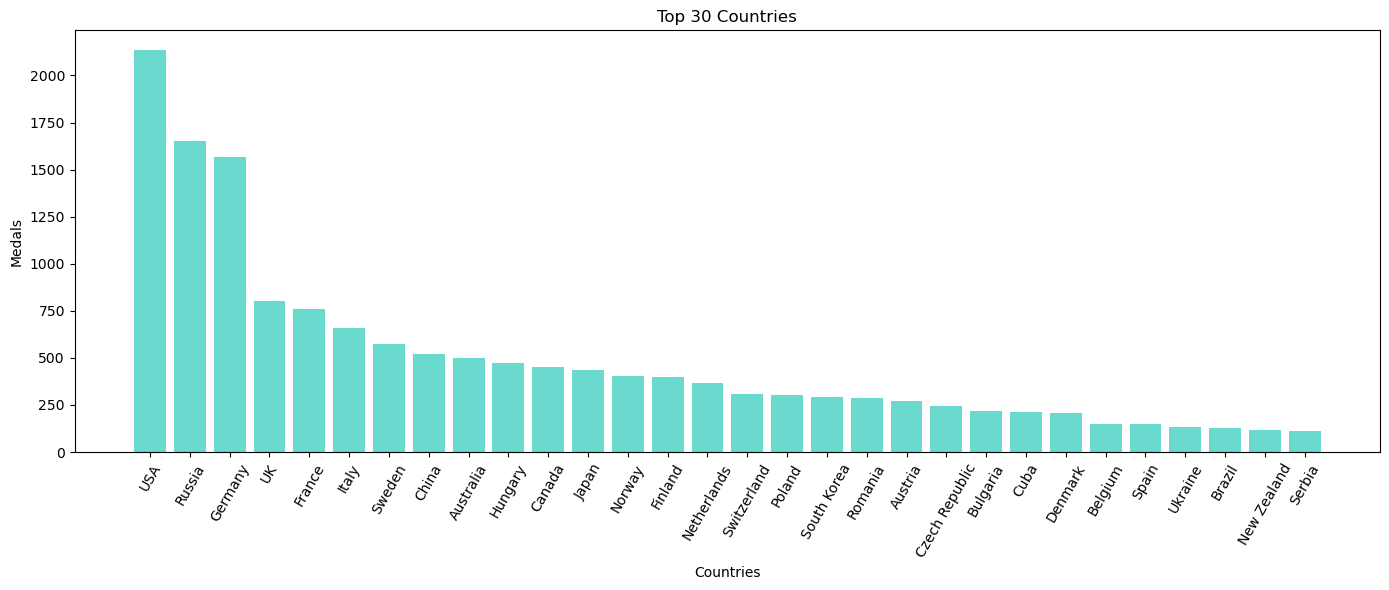

In [47]:
plt.figure(figsize=(14, 6))  
plt.bar(df_Countries_Medals["Country"].iloc[0:30], df_Countries_Medals["Medals"].iloc[0:30] , color= '#6ad9ce') 
plt.xlabel('Countries')
plt.ylabel('Medals')
plt.title('Top 30 Countries')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [48]:
df_Countries_Medals.to_csv("df_Countries_Medals.csv", index=False)

### 5. What is the medal efficiency for each Country?

In [49]:

df_Countries_Medals = df_medals.groupby("Country")["Medal"].count().reset_index(name = "Medals").sort_values(by = "Country")
df_Athletes_count = df[df["Country"].isin(df_Countries_Medals["Country"])]
df_Athletes_count = df_Athletes_count.groupby("Country")["ID"].count().reset_index(name = "Athletes").sort_values(by = "Country")
df_Medal_efficiency = pd.DataFrame(df_Athletes_count["Country"])
df_Medal_efficiency["Medal_ratio %"] = ((df_Countries_Medals["Medals"]/df_Athletes_count["Athletes"])*100).round(3)
df_Medal_efficiency = df_Medal_efficiency.sort_values(by = "Medal_ratio %" , ascending = False).reset_index(drop = True)
df_Medal_efficiency.head(30)



,Country,Medal_ratio %
0,Azerbaijan,15.548
1,Russia,14.146
2,Kosovo,12.500
3,USA,11.515
4,Ethiopia,11.111
5,Georgia,10.839
6,Kenya,10.233
7,Germany,10.038
8,China,8.943
9,Cuba,8.552


In [50]:
df_Medal_efficiency.to_csv("df_Medal_efficiency.csv", index=True)

### 6. What Is the Average Age, Height, and Weight of Athletes by Sport?


In [51]:
df_Age_cleaned.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age                  0
Height           45913
Weight           48309
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           213365
Country              0
host_country       879
dtype: int64

In [52]:
df.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age               8572
Height           57338
Weight           59999
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           228684
Country              0
host_country         0
dtype: int64

#### lets first drop nulls in Height and Weight

In [53]:
df_Age_cleaned.dropna(inplace = True, subset=["Height","Weight"])
df_Age_cleaned.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age                  0
Height               0
Weight               0
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           171881
Country              0
host_country       195
dtype: int64

In [54]:
df_Age_cleaned.groupby(["Sport"])["Age","Height","Weight"].mean()


/var/folders/73/ym2gq6ss1_v_l64p9gln8r840000gn/T/ipykernel_31495/756281439.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Age_cleaned.groupby(["Sport"])["Age","Height","Weight"].mean()


,Age,Height,Weight
Sport,,,
Alpine Skiing,23.313539,173.508472,72.071971
Archery,25.195357,173.293884,69.791619
Art Competitions,29.142857,168.428571,75.142857
Athletics,25.214924,176.282291,69.239008
Badminton,25.752577,174.247423,68.194772
...,...,...,...
Tug-Of-War,25.000000,182.555556,91.166667
Volleyball,25.205199,186.970336,78.880428
Water Polo,25.639453,185.036941,84.550794


#### lets show for top 5 olympic games

In [55]:
df_Age_cleaned = df_Age_cleaned.groupby(["Sport"])["Age","Height","Weight"].mean()
df_top_5= df_Age_cleaned.loc[["Swimming", "Gymnastics" , "Basketball" , "Athletics", "Football"]]
df_top_5

/var/folders/73/ym2gq6ss1_v_l64p9gln8r840000gn/T/ipykernel_31495/2698813562.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Age_cleaned = df_Age_cleaned.groupby(["Sport"])["Age","Height","Weight"].mean()


,Age,Height,Weight
Sport,,,
Swimming,20.618634,178.601960,70.598231
Gymnastics,21.651843,162.851283,56.873876
Basketball,25.442565,191.220464,85.795362
Athletics,25.214924,176.282291,69.239008
Football,23.568018,175.435586,70.476239


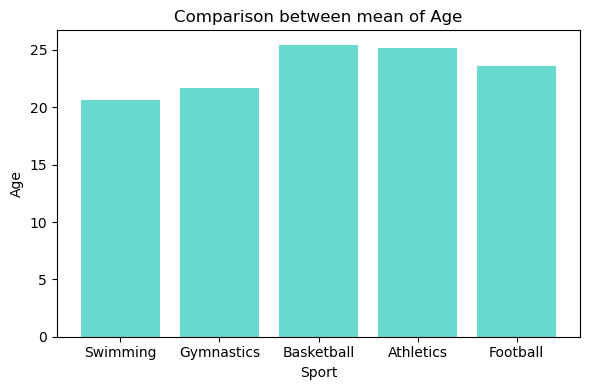

In [56]:
plt.figure(figsize=(6, 4))  
plt.bar(df_top_5.index, df_top_5["Age"], color= '#6ad9ce') 
plt.xlabel('Sport')
plt.ylabel('Age')
plt.title('Comparison between mean of Age')
plt.tight_layout()
plt.show()

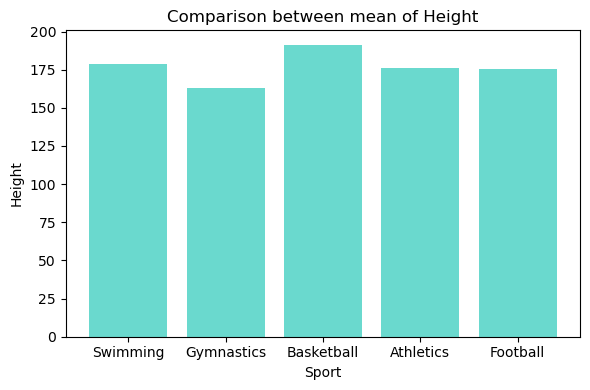

In [57]:
plt.figure(figsize=(6, 4))  
plt.bar(df_top_5.index, df_top_5["Height"], color='#6ad9ce') 
plt.xlabel('Sport')
plt.ylabel('Height')
plt.title('Comparison between mean of Height')
plt.tight_layout()
plt.show()

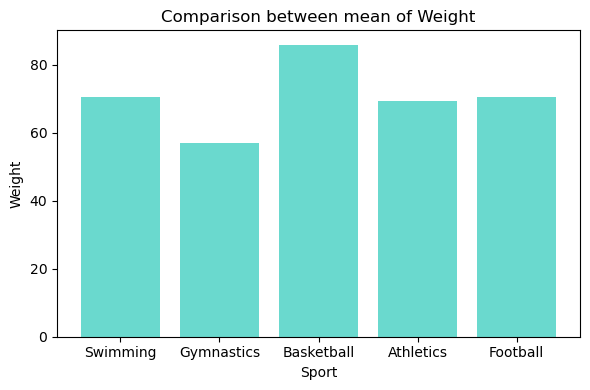

In [58]:
plt.figure(figsize=(6, 4))  
plt.bar(df_top_5.index, df_top_5["Weight"], color='#6ad9ce') 
plt.xlabel('Sport')
plt.ylabel('Weight')
plt.title('Comparison between mean of Weight')
plt.tight_layout()
plt.show()

#### What is the performance difference between summer and winter olympics for each country?

In [59]:
df_Countries_Medals = df_medals.groupby(["Country","Season"])["Medal"].count().reset_index(name='Medals')
df_filtered_S_W = df_Countries_Medals.groupby('Country').filter(lambda x: set(x['Season']) == {'Summer','Winter'})
df_filtered_S_W=df_filtered_S_W.reset_index(drop= True)
total_medals = df_filtered_S_W.groupby('Country')['Medals'].transform('sum')
df_filtered_S_W['Medals_Ratio'] = df_filtered_S_W['Medals'] / total_medals
df_filtered_S_W


,Country,Season,Medals,Medals_Ratio
0,Australia,Summer,484,0.973843
1,Australia,Winter,13,0.026157
2,Austria,Summer,96,0.354244
3,Austria,Winter,175,0.645756
4,Belarus,Summer,79,0.849462
...,...,...,...,...
73,USA,Winter,242,0.113455
74,Ukraine,Summer,124,0.946565
75,Ukraine,Winter,7,0.053435
76,Uzbekistan,Summer,33,0.970588


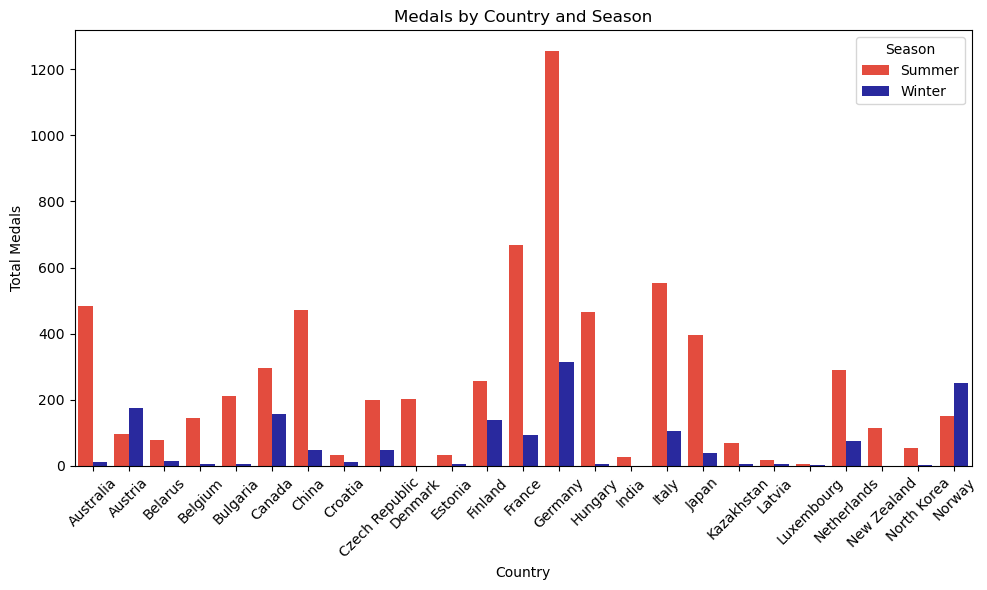

In [60]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
custom_colors = {"Summer": "#ff3522", "Winter": "#1515b2"} 
sns.barplot(x='Country', y='Medals', hue='Season',palette = custom_colors , data=df_filtered_S_W[0:50])

# Customizing the plot
plt.title('Medals by Country and Season')
plt.ylabel('Total Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

In [61]:
Summer_average = df_filtered_S_W[df_filtered_S_W["Season"] == "Summer"]["Medals_Ratio"].mean()
print("The average of wining a medals for Summer olympics is: ",Summer_average)
Winter_average = df_filtered_S_W[df_filtered_S_W["Season"] == "Winter"]["Medals_Ratio"].mean()
print("The average of wining a medals for Winter olympics is: ",Winter_average)

The average of wining a medals for Summer olympics is:  0.8405274174608304
The average of wining a medals for Winter olympics is:  0.15947258253916968


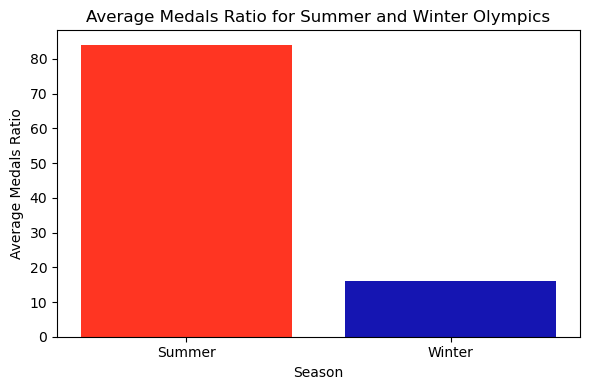

In [62]:
# Calculate the averages
Summer_average = df_filtered_S_W[df_filtered_S_W["Season"] == "Summer"]["Medals_Ratio"].mean()*100
Winter_average = df_filtered_S_W[df_filtered_S_W["Season"] == "Winter"]["Medals_Ratio"].mean()*100
# Prepare data for the bar plot
seasons = ["Summer", "Winter"]
averages = [Summer_average, Winter_average]

# Create the bar plot
plt.figure(figsize=(6 , 4))
plt.bar(seasons, averages, color=["#ff3522", "#1515b2"])
plt.xlabel("Season")
plt.ylabel("Average Medals Ratio")
plt.title("Average Medals Ratio for Summer and Winter Olympics")
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
df_filtered_S_W.to_csv("df_filtered_S&W.csv", ) 